In [167]:
import numpy as np
import matplotlib.pyplot as plt
from tikzplotlib import save as tikz_save

from ClusterAnalysis import report


In [168]:
colors = np.array([[1,0,0], [0,1,0], [0,0,1], 
                  [0,1,1], [1,0,1], [1,1,0]])
colors = np.append(colors, .5 * colors, axis=0)

def getColors(k):
    if k > colors.shape[0]:
        col = np.repeat(colors, np.ceil(k / colors.shape[0]), axis=0)
    else:
        col = colors
    return col[:k]

def showScatterPlot(A, lim_shift=0.5):
    k,n,d = A.shape
    col = getColors(k)
    Acol = np.zeros((k*n,3))
    for i in range(k):
        for j in range(n):
            Acol[i*n+j,:] = col[i]
            
    plt.scatter(A[:,:,0], A[:,:,1], c=Acol)
    plt.xlim(0-lim_shift, 1+lim_shift)
    plt.ylim(0-lim_shift, 1+lim_shift)

In [169]:
import pickle
import os.path

def encoding_exists(epoch, negatives_selection_mode, training_num):
    file_path = fn = '../work_dirs/generated_32D_7classes_triplet_nopre/' + 'val_encodings_{}D_{}classes_training{}_epoch{}_neg_{}.pkl'.format(32, 5, training_num, epoch, negatives_selection_mode)
    return os.path.exists(file_path)

def load_encodings(epoch, negatives_selection_mode, training_num):
    fn = '../work_dirs/generated_32D_7classes_triplet_nopre/' + 'val_encodings_{}D_{}classes_training{}_epoch{}_neg_{}.pkl'.format(32, 5, training_num, epoch, negatives_selection_mode)
    with open(fn, 'rb') as f:
        A = pickle.load(f)
    return A

In [170]:
import pandas as pd

In [171]:
if not os.path.exists('../work_dirs/generated_32D_7classes_triplet_nopre/reports_sum.pkl'):
    #init df
    A = load_encodings(0, 'random', 0)
    r = report(A)
    r['epoch'] = 0
    r['negative_selection'] = ''
    r['training_num'] = 0
    r = {k : [] for k in r} #elements of dict must be lists for pd at init
    df = pd.DataFrame.from_dict(r)
    for neg in ['random', 'semihard', 'hardest', 'mixed']:
        for trn in range(0, 20):
            e = 0
            while encoding_exists(e, neg, trn):
                A = load_encodings(e, neg, trn)
                r = report(A)
                r['epoch'] = e
                r['negative_selection'] = neg
                r['training_num'] = trn
                df = df.append(r, ignore_index=True)
                e += 10
            print("loaded {} training {} total of {} epochs".format(neg, trn, e))
    pd.to_pickle(df, "../work_dirs/generated_32D_7classes_triplet_nopre/reports_sum.pkl")
else:
    df = pd.read_pickle("../work_dirs/generated_32D_7classes_triplet_nopre/reports_sum.pkl")
    print("loaded from existing sum")

loaded from existing sum


In [172]:
df

,avgCentroidDistance,avgClosestNegatives,avgClusterRadius,avgPctOfNegativesInCluster,avgPctOfNegativesInClusterWithMargin,avgPositiveDistance,stdPositiveDistance,avgDistanceOfFurthestPositives,avgDistanceBetweenElements,stdDistanceBetweenElements,epoch,negative_selection,training_num
0,0.481941,0.061570,0.571254,0.70558,0.769604,0.253617,0.167889,1.001330,0.479981,0.290878,0.0,random,0.0
1,1.731178,0.800728,0.616087,0.00198,0.013301,0.238295,0.201567,1.023636,1.445112,0.763579,10.0,random,0.0
2,1.846382,0.949567,0.570491,0.00000,0.001980,0.215260,0.191856,0.938969,1.530751,0.817624,20.0,random,0.0
3,1.846005,0.989103,0.510110,0.00000,0.000000,0.199572,0.184659,0.867053,1.526296,0.823048,30.0,random,0.0
4,1.896969,1.062051,0.512377,0.00000,0.000000,0.196855,0.179205,0.867084,1.566215,0.842489,40.0,random,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,1.725748,0.941367,0.262024,0.00000,0.000000,0.115500,0.145328,0.443055,1.408305,0.870657,100.0,mixed,19.0
677,1.706416,0.949175,0.246580,0.00000,0.000000,0.112950,0.144655,0.447776,1.391994,0.868049,110.0,mixed,19.0
678,1.751576,0.964099,0.257148,0.00000,0.000000,0.113877,0.144303,0.446639,1.428480,0.886159,120.0,mixed,19.0
679,1.745040,0.964936,0.246492,0.00000,0.000000,0.114467,0.146213,0.450157,1.423250,0.888886,130.0,mixed,19.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000121BF79FDC8>,
      dtype=object)

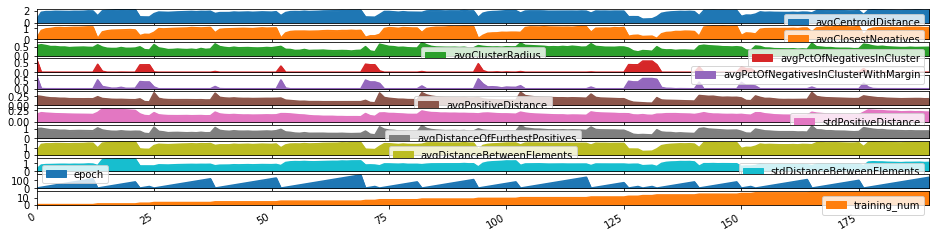

In [173]:
df[df["negative_selection"] == "random"].plot.area(figsize=(16,4), subplots=True)

In [174]:
def plotParameters(df, neg, param, c=0, count=False, representative=None, findRepresentative=True, includeAll=True, includeAvg=True):
    color = plt.cm.gist_rainbow(np.linspace(0, 1, 4))
    random_df = df[df["negative_selection"] == neg]
    if count:
        cnt = random_df[[param, 'epoch']].groupby(['epoch']).count()
        plt.plot(20 - cnt.values, c=color[c], label=neg)
    else:
        arr = [gb[1] for gb in random_df.groupby(['training_num'])]
        if includeAll:
            for v in arr:
                plt.plot(v[param].values, c=color[c], alpha=.2)
        avg = random_df[[param, 'epoch']].groupby(['epoch']).mean()
        if findRepresentative and representative is None:
            allavg = random_df.groupby(['epoch']).mean()
            allavg.drop(['training_num'], axis=1, inplace=True)
            m_ = [(allavg.reset_index() - arr[i].reset_index()).abs().drop(['index', 'negative_selection', 'training_num'], axis=1).dropna().values.mean() for i in range(0,20)]
            lengths = np.array([len(a) for a in arr])
            m_ = np.reshape(m_, (20,1))
            lengths = np.reshape(lengths, (20,1))
            lengths = np.abs(1 - (lengths / lengths.mean()))
            representative = np.sum(np.append(m_, .5 * lengths, axis=1), axis=1).argmin()
        if representative is not None:
            plt.plot(arr[representative][param].values, '-', c=color[c], label="NSPA" if neg == "mixedlinear" else neg, linewidth=4)
        if includeAvg:
            plt.plot(avg.values, c=color[c], linewidth=2.5, dashes=[1,1])

([<matplotlib.axis.XTick at 0x121c0ac6e48>,
 <a list of 10 Text xticklabel objects>)

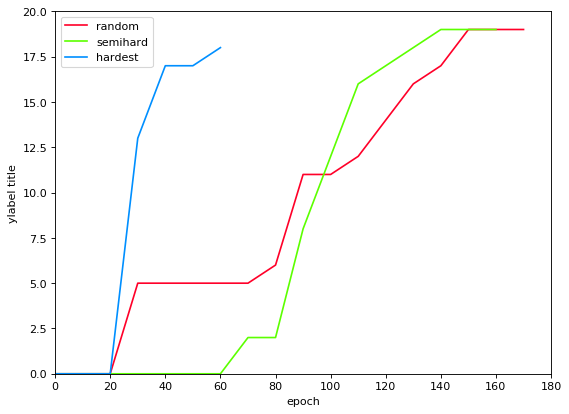

In [175]:
param = "avgClusterRadius"
plt.figure(figsize=(8, 6), dpi=80)
plotParameters(df, "random", param, count=True)
plotParameters(df, "semihard", param, c=1, count=True)
plotParameters(df, "hardest", param, c=2, count=True)
#plotParameters("mixed", param, c=3, count=True)
plt.legend(loc='best')
plt.xlabel("epoch")
plt.ylabel("ylabel title")
plt.ylim(bottom=0, top=20)
plt.xlim(left=0)
ls, _ = plt.xticks()
plt.xticks(ls, [str(int(l*10)) for l in ls])

In [176]:
df.loc[df["avgDistanceBetweenElements"] == 0, ["avgDistanceBetweenElements"]] = 0.00001
df["normClosestNegatives"] = df["avgClosestNegatives"] / df["avgDistanceBetweenElements"]
df["normClusterRadius"] = df["avgClusterRadius"] / df["avgDistanceBetweenElements"]
df["normDistanceOfFurthestPositives"] = df["avgDistanceOfFurthestPositives"] / df["avgDistanceBetweenElements"]
df["normPositiveDistance"] = df["avgPositiveDistance"] / df["avgDistanceBetweenElements"]

In [177]:
df.columns

Index(['avgCentroidDistance', 'avgClosestNegatives', 'avgClusterRadius',
       'avgPctOfNegativesInCluster', 'avgPctOfNegativesInClusterWithMargin',
       'avgPositiveDistance', 'stdPositiveDistance',
       'avgDistanceOfFurthestPositives', 'avgDistanceBetweenElements',
       'stdDistanceBetweenElements', 'epoch', 'negative_selection',
       'training_num', 'normClosestNegatives', 'normClusterRadius',
       'normDistanceOfFurthestPositives', 'normPositiveDistance'],
      dtype='object')

In [178]:
def plotParamForAll(df, param, left=0, bottom=0, yscale='linear', top=None, justMixedLinear=False, save=True, addCaption=True, ylabeltitle="distance", df2=None, includeAll=True):
    fig = plt.figure(figsize=(8, 6), dpi=80)
    if addCaption:
        fig.suptitle(param)
    if justMixedLinear:
        plotParameters(df, "mixedlinear", param)
    else:
        plotParameters(df, "random", param, includeAll=includeAll)
        plotParameters(df, "semihard", param, c=1, includeAll=includeAll)
        plotParameters(df, "hardest", param, c=2, includeAll=includeAll)
    if df2 is not None:
        plotParameters(df2, "mixedlinear", param, c=3, includeAll=includeAll)
    if not justMixedLinear:
        plt.legend(loc='best')
    plt.xlabel("epoch")
    plt.ylabel(ylabeltitle)
    if left is not None:
        plt.xlim(left=left)
    if bottom is not None:
        plt.ylim(bottom=bottom)
    if top is not None:
        plt.ylim(top=top)
    plt.yscale(yscale)
    ls, _ = plt.xticks()
    plt.xticks(ls, [str(int(l*10)) for l in ls])
    #plt.savefig("fig_{}_{}.pgf".format("mixedlinear" if justMixedLinear else "random_semihard_hardest", param))
    tikz_save("fig_{}_{}.tikz".format("mixedlinear" if justMixedLinear else "all" if df2 is not None else "random_semihard_hardest", param))

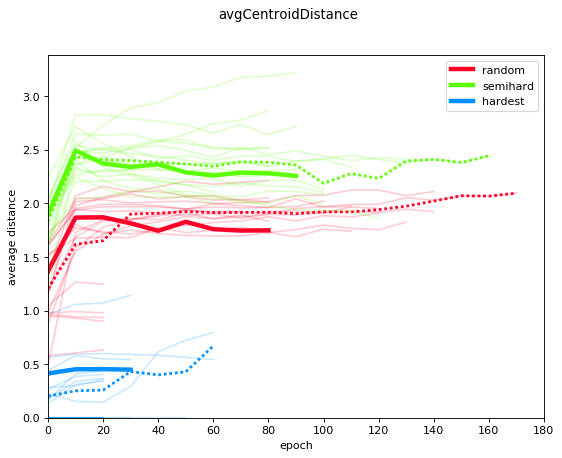

In [179]:
plotParamForAll(df, "avgCentroidDistance", ylabeltitle="average distance")

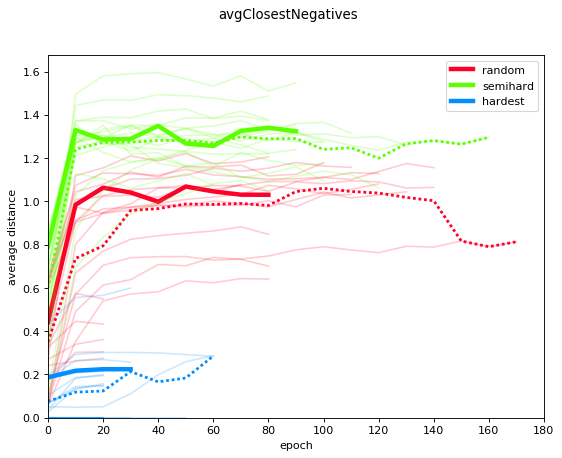

In [180]:
plotParamForAll(df, "avgClosestNegatives", ylabeltitle="average distance")

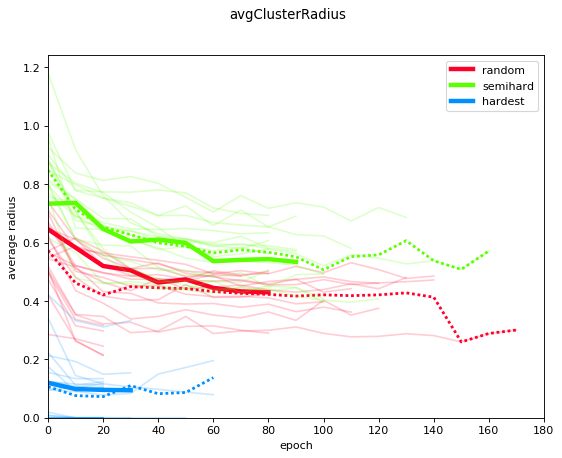

In [181]:
plotParamForAll(df, "avgClusterRadius", ylabeltitle="average radius")


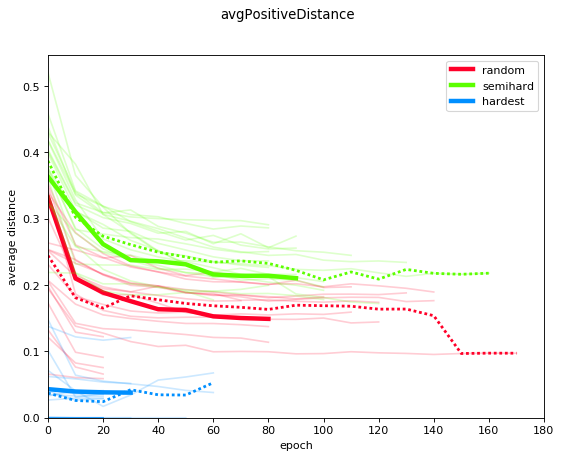

In [182]:
plotParamForAll(df, "avgPositiveDistance", ylabeltitle="average distance")


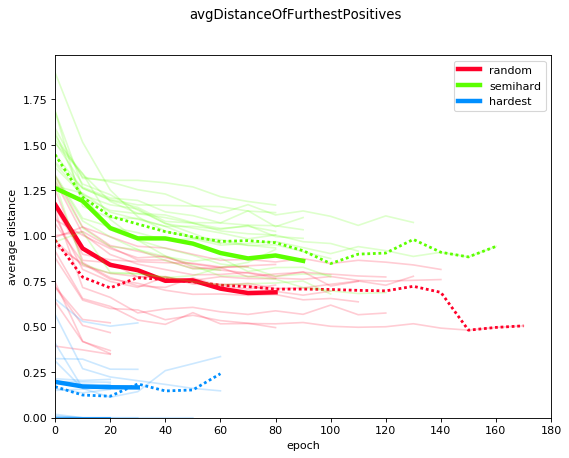

In [183]:
plotParamForAll(df, "avgDistanceOfFurthestPositives", ylabeltitle="average distance")


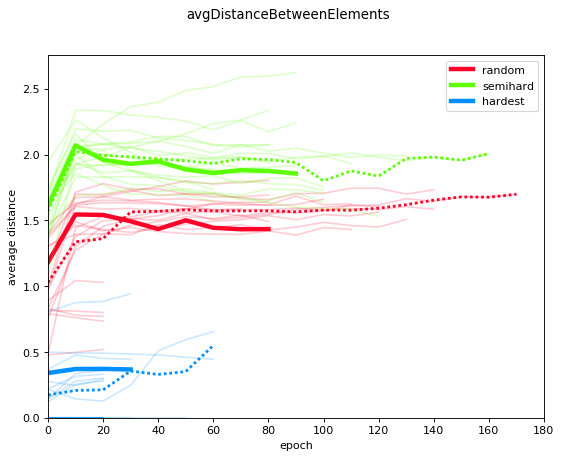

In [184]:
plotParamForAll(df, "avgDistanceBetweenElements", ylabeltitle="average distance")

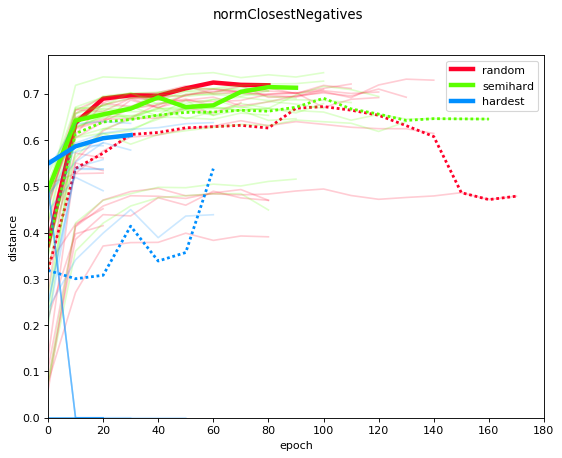

In [185]:
#'normClosestNegatives', 'normClusterRadius','normDistanceOfFurthestPositives', 'normPositiveDistance'
plotParamForAll(df, "normClosestNegatives", top=None)

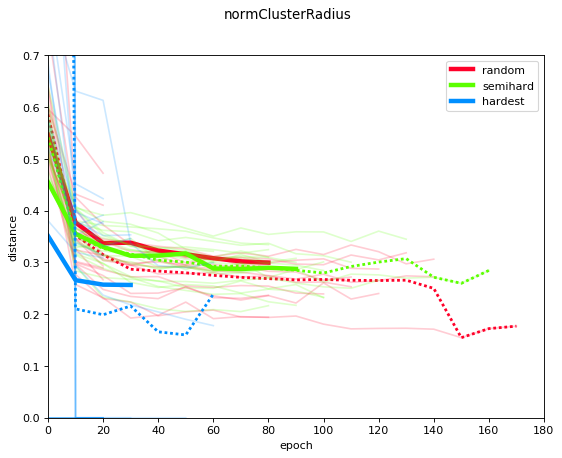

In [186]:
plotParamForAll(df, "normClusterRadius", top=.7)


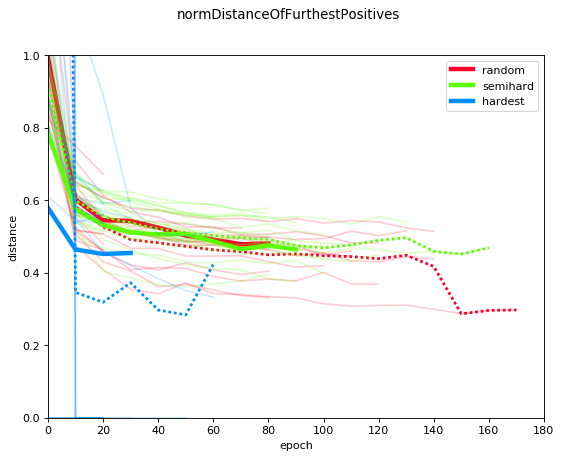

In [187]:
plotParamForAll(df, "normDistanceOfFurthestPositives", top=1)

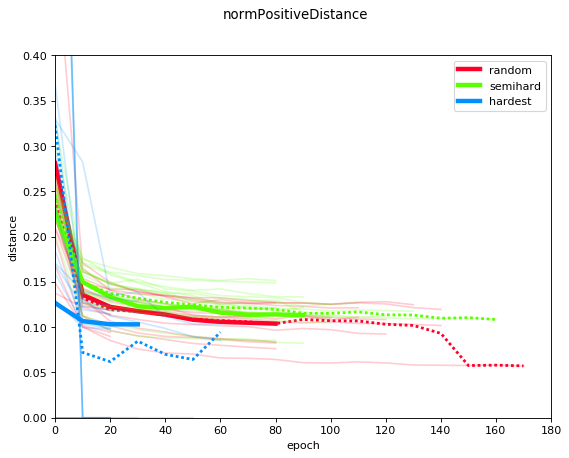

In [188]:
plotParamForAll(df, "normPositiveDistance", top=.4)

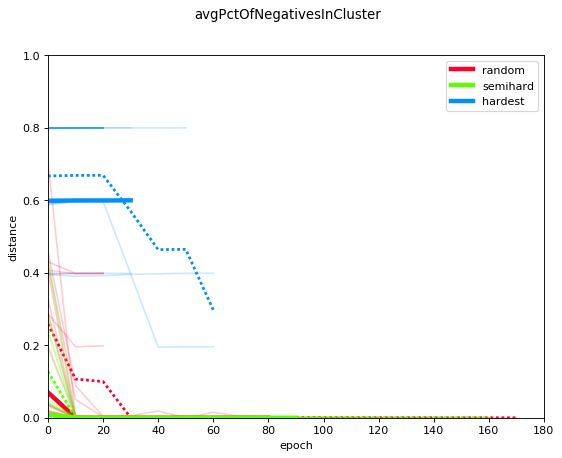

In [189]:
plotParamForAll(df, 'avgPctOfNegativesInCluster', top=1)

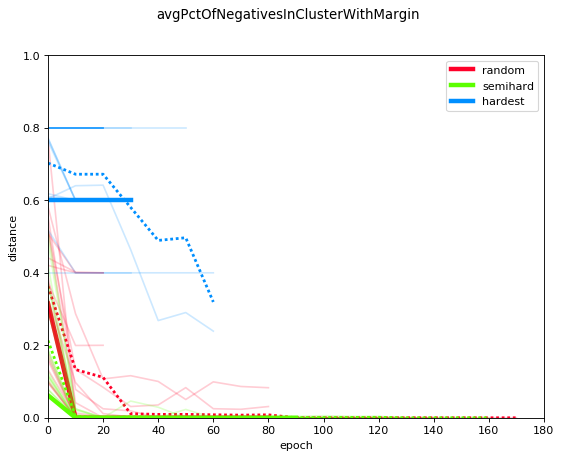

In [190]:
plotParamForAll(df, 'avgPctOfNegativesInClusterWithMargin', top=1)

#### sandbox

In [191]:
param = "avgClusterRadius"
neg = "mixed"
color = plt.cm.gist_rainbow(np.linspace(0, 1, 4))
random_df = df[df["negative_selection"] == neg]

In [192]:
arr = [gb[1] for gb in random_df.groupby(['training_num'])]
arr[19].reset_index()

,index,avgCentroidDistance,avgClosestNegatives,avgClusterRadius,avgPctOfNegativesInCluster,avgPctOfNegativesInClusterWithMargin,avgPositiveDistance,stdPositiveDistance,avgDistanceOfFurthestPositives,avgDistanceBetweenElements,stdDistanceBetweenElements,epoch,negative_selection,training_num,normClosestNegatives,normClusterRadius,normDistanceOfFurthestPositives,normPositiveDistance
0,666,1.462085,0.411040,0.569034,0.132166,0.259810,0.247678,0.213689,1.024884,1.230325,0.721863,0.0,mixed,19.0,0.334090,0.462507,0.833018,0.201311
1,667,1.726553,0.846085,0.419723,0.000000,0.005825,0.168708,0.181988,0.682731,1.421080,0.873298,10.0,mixed,19.0,0.595382,0.295355,0.480431,0.118718
2,668,1.740484,0.906685,0.317975,0.000000,0.000000,0.145387,0.170327,0.566428,1.426809,0.880046,20.0,mixed,19.0,0.635463,0.222857,0.396989,0.101896
3,669,1.685250,0.897104,0.274944,0.000000,0.000000,0.130090,0.156435,0.486600,1.379161,0.850362,30.0,mixed,19.0,0.650471,0.199356,0.352823,0.094326
4,670,1.677607,0.900422,0.267250,0.000000,0.000000,0.128504,0.157089,0.485396,1.372659,0.855455,40.0,mixed,19.0,0.655969,0.194695,0.353617,0.093617
5,671,1.690923,0.913848,0.260712,0.000000,0.000000,0.123250,0.152999,0.471593,1.382087,0.857068,50.0,mixed,19.0,0.661209,0.188637,0.341218,0.089176
6,672,1.709146,0.905663,0.297801,0.000000,0.000000,0.123971,0.153090,0.482654,1.397007,0.864367,60.0,mixed,19.0,0.648288,0.213171,0.345491,0.088741
7,673,1.728978,0.940585,0.277157,0.000000,0.000000,0.123960,0.150941,0.458393,1.412751,0.883754,70.0,mixed,19.0,0.665783,0.196183,0.324468,0.087744
8,674,1.698774,0.913106,0.272172,0.000000,0.000000,0.119185,0.150864,0.459596,1.387577,0.862614,80.0,mixed,19.0,0.658058,0.196149,0.331222,0.085894
9,675,1.688237,0.919872,0.252551,0.000000,0.000000,0.119357,0.151572,0.451295,1.379167,0.858928,90.0,mixed,19.0,0.666977,0.183119,0.327223,0.086543


In [193]:
avg = random_df.groupby(['epoch']).mean()
avg.drop(['training_num'], axis=1, inplace=True)
avg.reset_index()

,epoch,avgCentroidDistance,avgClosestNegatives,avgClusterRadius,avgPctOfNegativesInCluster,avgPctOfNegativesInClusterWithMargin,avgPositiveDistance,stdPositiveDistance,avgDistanceOfFurthestPositives,avgDistanceBetweenElements,stdDistanceBetweenElements,normClosestNegatives,normClusterRadius,normDistanceOfFurthestPositives,normPositiveDistance
0,0.0,1.307301,0.421989,0.599546,0.188113,0.292926,0.248907,0.208930,1.001480,1.112208,0.706987,0.359847,0.554636,0.914880,0.223478
1,10.0,1.806094,0.906443,0.502419,0.023554,0.047676,0.211623,0.196489,0.863150,1.496767,0.888781,0.598230,0.336327,0.576258,0.140595
2,20.0,1.849259,0.960355,0.467964,0.010342,0.022405,0.194572,0.189828,0.803058,1.526608,0.920262,0.627069,0.304646,0.522393,0.126256
3,30.0,1.860910,0.973342,0.451623,0.009898,0.016168,0.186550,0.185907,0.777481,1.533935,0.929398,0.633833,0.292456,0.503093,0.120499
4,40.0,1.864978,1.020712,0.435852,0.000000,0.002504,0.183400,0.177184,0.755168,1.536691,0.893021,0.665301,0.281044,0.486924,0.118339
5,50.0,1.876344,1.029364,0.432657,0.000000,0.001655,0.181736,0.175108,0.748409,1.545362,0.897383,0.666977,0.277406,0.480086,0.116589
6,60.0,1.891733,1.040205,0.434595,0.000116,0.004242,0.179272,0.174276,0.744956,1.557022,0.908104,0.668793,0.277481,0.475186,0.114207
7,70.0,1.872742,1.036121,0.423878,0.000000,0.003349,0.172755,0.169306,0.721810,1.540328,0.895748,0.673073,0.273471,0.465521,0.111354
8,80.0,1.905589,1.046896,0.426252,0.000000,0.007498,0.172190,0.175589,0.721284,1.566388,0.926078,0.668948,0.270005,0.456513,0.109134
9,90.0,1.919826,1.069298,0.446011,0.000000,0.001126,0.185491,0.182701,0.769003,1.581458,0.907760,0.676033,0.279067,0.481101,0.116331


In [194]:
(avg.reset_index() - arr[10].reset_index()).abs().drop(['index', 'negative_selection', 'training_num'], axis=1).dropna()

,avgCentroidDistance,avgClosestNegatives,avgClusterRadius,avgDistanceBetweenElements,avgDistanceOfFurthestPositives,avgPctOfNegativesInCluster,avgPctOfNegativesInClusterWithMargin,avgPositiveDistance,epoch,normClosestNegatives,normClusterRadius,normDistanceOfFurthestPositives,normPositiveDistance,stdDistanceBetweenElements,stdPositiveDistance
0,0.298621,0.274826,0.159023,0.264628,0.236325,0.081999,0.176592,0.0742217,0,0.18622,0.0348942,0.0121274,0.0173794,0.06673,0.0537967
1,0.00613414,0.313939,0.0051106,0.0206188,0.0167105,0.0157487,0.119705,0.0441696,0,0.196844,0.000569606,0.00284667,0.0271551,0.358073,0.0479694
2,0.141578,0.264577,0.0668849,0.104302,0.0941191,0.00249851,0.113276,0.0179777,0,0.20045,0.0232997,0.0277152,0.0179769,0.495762,0.0858455
3,0.227482,0.200172,0.0758185,0.176624,0.121093,0.00989796,0.071258,0.00269582,0,0.181834,0.0158887,0.0222177,0.0130165,0.573549,0.112521


In [195]:
for i in range(0,20):
    m = (avg.reset_index() - arr[i].reset_index()).abs().drop(['index', 'negative_selection', 'training_num'], axis=1).dropna().values
    print(i, m.mean())

0 0.045423259034281696
1 0.05381448518841568
2 0.036978018971949106
3 0.17016850466033914
4 0.05211360795918406
5 0.06792824525659387
6 0.06754741790484685
7 0.031447519049552945
8 0.04536422309096988
9 0.09124354841530234
10 0.10955519644722463
11 0.07898372047641301
12 0.092722087841794
13 0.02443921439441347
14 0.10974869654284426
15 0.057166519730599434
16 0.054024060454685614
17 0.030303149833785344
18 0.04878288377125119
19 0.08002820227194173


In [196]:
m_ = [(avg.reset_index() - arr[i].reset_index()).abs().drop(['index', 'negative_selection', 'training_num'], axis=1).dropna().values.mean() for i in range(0,20)]
np.array(m_)

array([0.04542326, 0.05381449, 0.03697802, 0.1701685 , 0.05211361,
       0.06792825, 0.06754742, 0.03144752, 0.04536422, 0.09124355,
       0.1095552 , 0.07898372, 0.09272209, 0.02443921, 0.1097487 ,
       0.05716652, 0.05402406, 0.03030315, 0.04878288, 0.0800282 ])

In [197]:
lengths = np.array([len(a) for a in arr])
m_ = np.reshape(m_, (20,1))
lengths = np.reshape(lengths, (20,1))
lengths = np.abs(1 - (lengths / lengths.mean()))

In [198]:
for pct in range(0, 10):
    print(pct, np.sum(np.append(m_, (pct/10) * lengths, axis=1), axis=1).argmin())

0 13
1 7
2 7
3 7
4 7
5 7
6 18
7 18
8 18
9 18


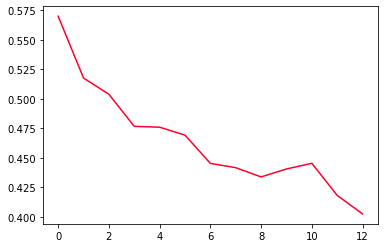

In [199]:
plt.plot(arr[13][param].values, '-', c=color[0], label=neg, linewidth=1.5)

# mixed linear analysis

In [200]:
#init df
A = load_encodings(0, 'mixedlinear', 0)
r = report(A)
r['epoch'] = 0
r['negative_selection'] = ''
r['training_num'] = 0
r = {k : [] for k in r} #elements of dict must be lists for pd at init
df2 = pd.DataFrame.from_dict(r)

In [201]:
if not os.path.exists('../work_dirs/generated_32D_7classes_triplet_nopre/reports_sum_mixedlinear.pkl'):
    neg = 'mixedlinear'
    for trn in range(0, 20):
        e = 0
        while encoding_exists(e, neg, trn):
            A = load_encodings(e, neg, trn)
            r = report(A)
            r['epoch'] = e
            r['negative_selection'] = neg
            r['training_num'] = trn
            df2 = df2.append(r, ignore_index=True)
            e += 10
        print("loaded {} training {} total of {} epochs".format(neg, trn, e))
    pd.to_pickle(df2, "../work_dirs/generated_32D_7classes_triplet_nopre/reports_sum_mixedlinear.pkl")
else:
    df2 = pd.read_pickle("../work_dirs/generated_32D_7classes_triplet_nopre/reports_sum_mixedlinear.pkl")
    print("loaded from existing sum")

loaded from existing sum


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000121C0A88848>,
      dtype=object)

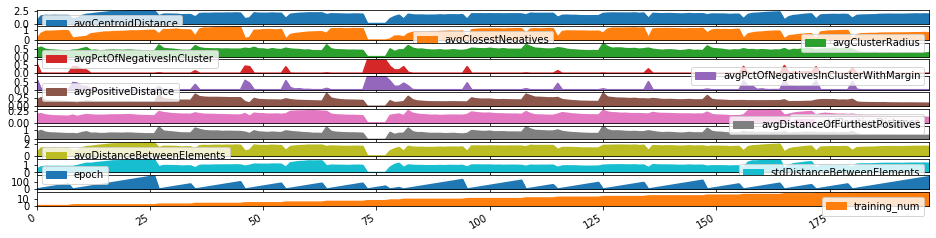

In [202]:
df2.plot.area(figsize=(16,4), subplots=True)

In [203]:
df2.loc[df2["avgDistanceBetweenElements"] == 0, ["avgDistanceBetweenElements"]] = 0.00001
df2["normClosestNegatives"] = df2["avgClosestNegatives"] / df2["avgDistanceBetweenElements"]
df2["normClusterRadius"] = df2["avgClusterRadius"] / df2["avgDistanceBetweenElements"]
df2["normDistanceOfFurthestPositives"] = df2["avgDistanceOfFurthestPositives"] / df2["avgDistanceBetweenElements"]
df2["normPositiveDistance"] = df2["avgPositiveDistance"] / df2["avgDistanceBetweenElements"]

In [204]:
df2.keys()

Index(['avgCentroidDistance', 'avgClosestNegatives', 'avgClusterRadius',
       'avgPctOfNegativesInCluster', 'avgPctOfNegativesInClusterWithMargin',
       'avgPositiveDistance', 'stdPositiveDistance',
       'avgDistanceOfFurthestPositives', 'avgDistanceBetweenElements',
       'stdDistanceBetweenElements', 'epoch', 'negative_selection',
       'training_num', 'normClosestNegatives', 'normClusterRadius',
       'normDistanceOfFurthestPositives', 'normPositiveDistance'],
      dtype='object')

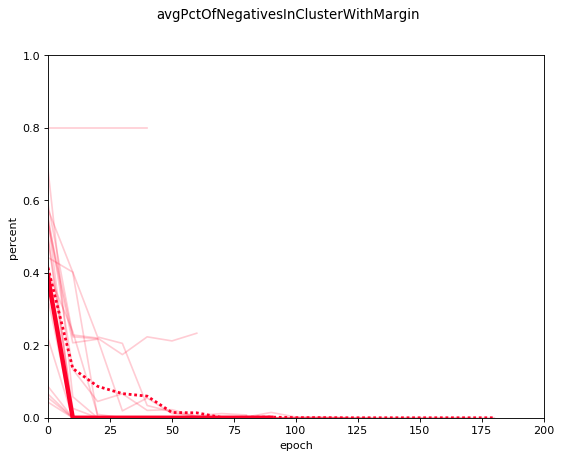

In [205]:
plotParamForAll(df2, "avgPctOfNegativesInClusterWithMargin", top=1, justMixedLinear=True, ylabeltitle="percent")

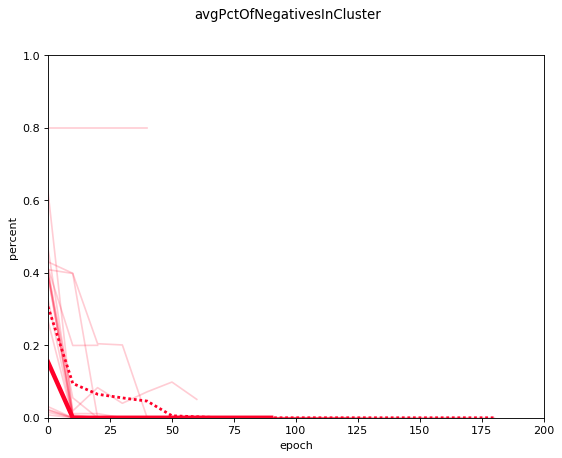

In [206]:
plotParamForAll(df2, "avgPctOfNegativesInCluster", top=1, justMixedLinear=True, ylabeltitle="percent")

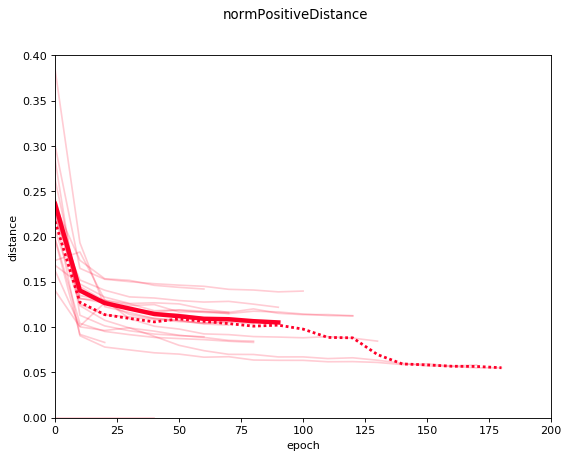

In [207]:
plotParamForAll(df2, "normPositiveDistance", top=.4, justMixedLinear=True)

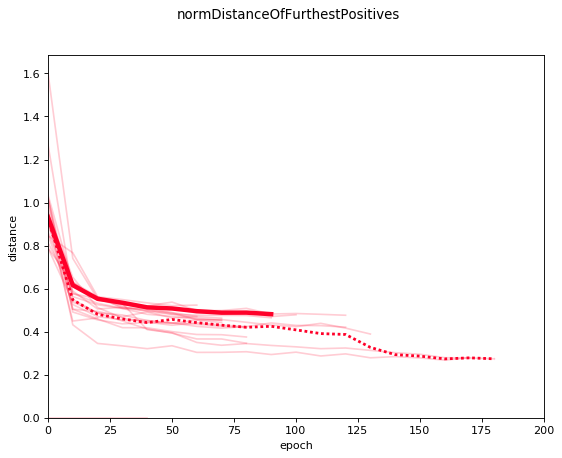

In [208]:
plotParamForAll(df2, "normDistanceOfFurthestPositives", justMixedLinear=True)

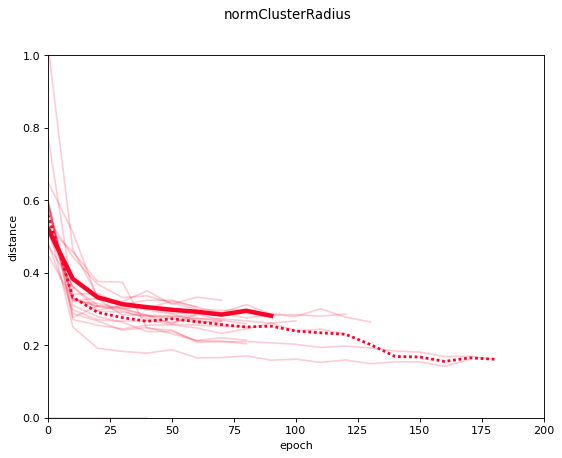

In [209]:
plotParamForAll(df2, "normClusterRadius", top=1, justMixedLinear=True)

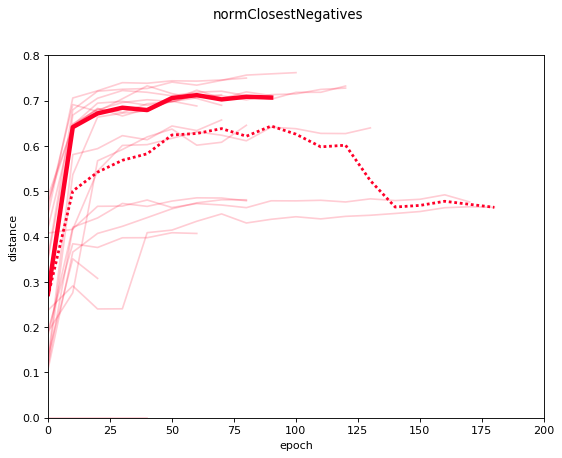

In [210]:
plotParamForAll(df2, "normClosestNegatives", justMixedLinear=True)

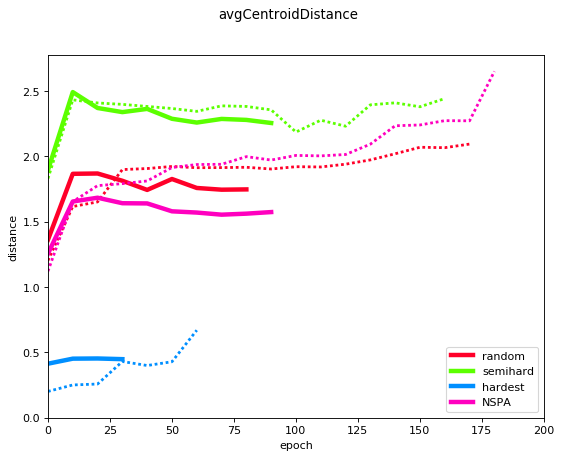

In [211]:
plotParamForAll(df, "avgCentroidDistance", df2=df2, includeAll=False)

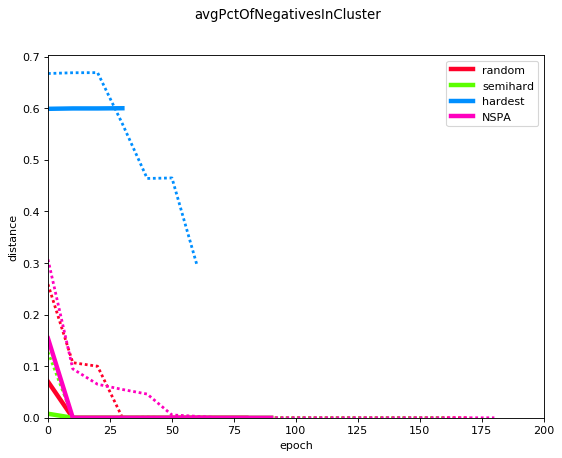

In [212]:
plotParamForAll(df, "avgPctOfNegativesInCluster", df2=df2, includeAll=False)

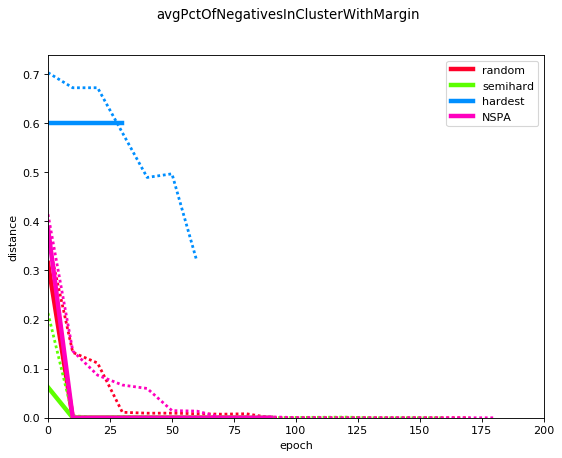

In [213]:
plotParamForAll(df, "avgPctOfNegativesInClusterWithMargin", df2=df2, includeAll=False)

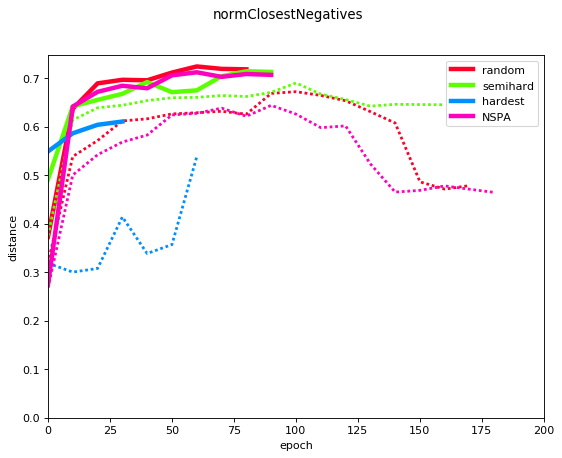

In [214]:
plotParamForAll(df, "normClosestNegatives", df2=df2, includeAll=False)

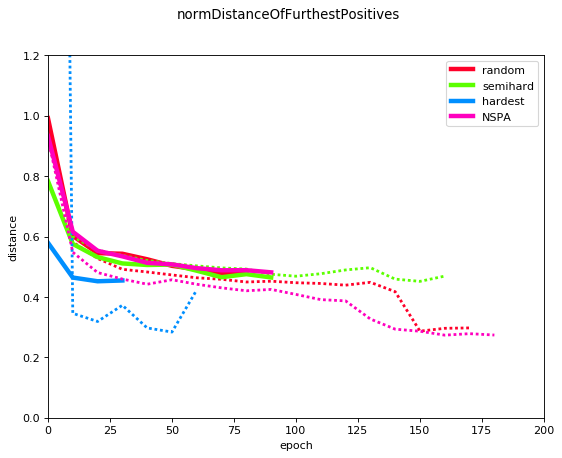

In [215]:
plotParamForAll(df, "normDistanceOfFurthestPositives", df2=df2, includeAll=False, top=1.2)

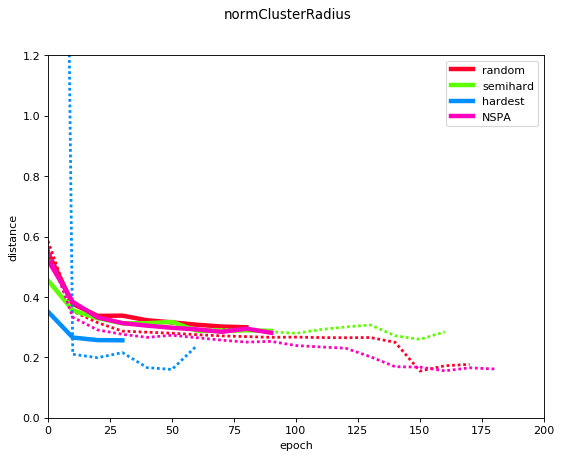

In [216]:
plotParamForAll(df, "normClusterRadius", df2=df2, includeAll=False, top=1.2)

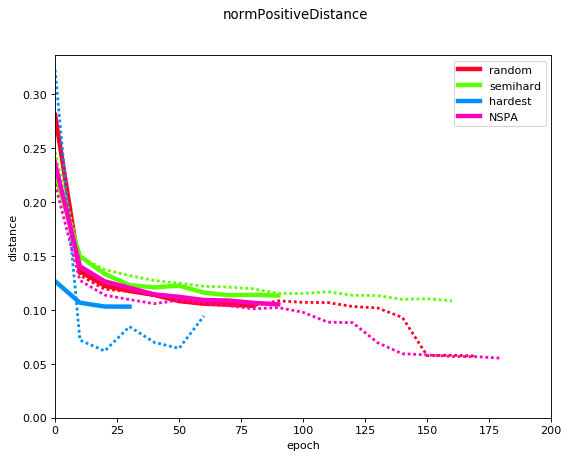

In [217]:
plotParamForAll(df, "normPositiveDistance", df2=df2, includeAll=False)